## Elk and Wolves and Lotka-Volterra

In [18]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [19]:
system = System(alpha = 0.05,
                beta = 0.1,
                gamma = 0.1,
                delta = 0.1)

state = State(prey = 1,
              pred = 1)

,values
prey,1
pred,1


In [20]:
def update_func(state, system):

    unpack(system)
    x, y = state
    
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    
    x += dxdt
    y += dydt
    
    return State(prey=x, pred=y)

In [21]:
def run_simulation(system, update_func):

    unpack(system)
    
    frame = TimeFrame(columns=state.index)
    frame.row[0] = state
    
    for t in linrange(0, 200):
        frame.row[t+1] = update_func(frame.row[t], system)
    
    return frame

In [22]:
update_func(state, system)

,values
prey,0.95
pred,1.00


In [32]:
results = run_simulation(system, update_func)
results.head()

,prey,pred
0,1,1
1,0.95,1
2,0.9025,0.995
3,0.857826,0.985299
4,0.816196,0.97129


In [33]:
def plot_results(prey, pred):
    
    plot(prey, '-', label='Prey')
    plot(pred, '-', label='Predators')

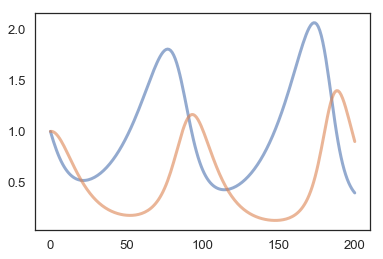

In [34]:
plot_results(results.prey, results.pred)